# Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras

import sys
sys.path.insert(0, '../../')
from plot_graphs import plot_loss, plot_acc

# Set image size, batch size, and import dataset

In [2]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

train = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/train/", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 3360 files belonging to 6 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 720 files belonging to 6 classes.
Found 720 files belonging to 6 classes.


2022-08-07 17:20:08.656006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-07 17:20:08.656190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Train from the 4th conv2d layer

In [3]:
vtid = keras.models.load_model('../../models/vtid2/m1_big.h5')
vtid.trainable = False

for layer in vtid.layers[6:]:
  layer.trainable = True

x = vtid.layers[-2].output
outputs = layers.Dense(6, activation='softmax', name='classifier')(x)
model = keras.Model(vtid.inputs, outputs)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                             

In [4]:

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=8
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="../../models/transfer/transfer_big_trainHalf.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]


In [5]:
history = model.fit(
  train.cache(),
  epochs=50,
  callbacks=callbacks_list,
  validation_data=val.cache()
)

Epoch 1/50


2022-08-07 17:20:09.526734: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-07 17:20:09.526832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - ETA: 0s - loss: 1.0088 - accuracy: 0.6304

2022-08-07 17:20:16.564768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 8s 67ms/step - loss: 1.0088 - accuracy: 0.6304 - val_loss: 0.5852 - val_accuracy: 0.8000
Epoch 2/50
105/105 [==============================] - 6s 60ms/step - loss: 0.4581 - accuracy: 0.8384 - val_loss: 0.4067 - val_accuracy: 0.8486
Epoch 3/50
105/105 [==============================] - 7s 64ms/step - loss: 0.2872 - accuracy: 0.8997 - val_loss: 0.5145 - val_accuracy: 0.8569
Epoch 4/50
105/105 [==============================] - 7s 66ms/step - loss: 0.1876 - accuracy: 0.9307 - val_loss: 1.0195 - val_accuracy: 0.8028
Epoch 5/50
105/105 [==============================] - 7s 66ms/step - loss: 0.1775 - accuracy: 0.9467 - val_loss: 0.4141 - val_accuracy: 0.8944
Epoch 6/50
105/105 [==============================] - 7s 66ms/step - loss: 0.1105 - accuracy: 0.9652 - val_loss: 0.5348 - val_accuracy: 0.8736
Epoch 7/50
105/105 [==============================] - 7s 64ms/step - loss: 0.0943 - accuracy: 0.9720 - val_loss: 0.4580 - val_accuracy: 0.9000
Epoch 8/50

In [6]:
model = keras.models.load_model("../../models/transfer/transfer_big_trainHalf.h5")
model.evaluate(test)

 1/23 [>.............................] - ETA: 4s - loss: 1.0945 - accuracy: 0.8750

2022-08-07 17:24:44.555682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 32ms/step - loss: 0.8964 - accuracy: 0.9292


[0.8963877558708191, 0.9291666746139526]

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

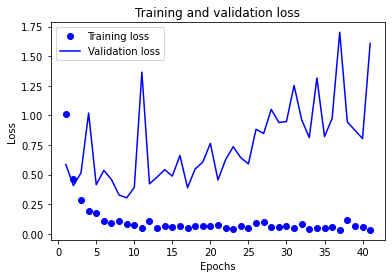

In [7]:
# Plotting loss and accuracy graphs
## Plotting loss
plot_loss(history)


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

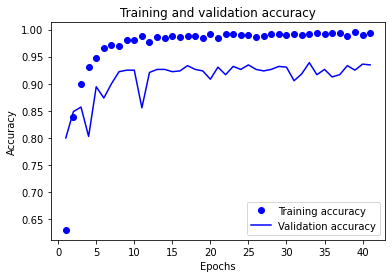

In [8]:
## Plotting accuracy
plot_acc(history)

# compare with untrained

In [9]:
untrained_model = keras.models.load_model("../../models/zenodo/m1_big.h5")
untrained_model.evaluate(test)

 3/23 [==>...........................] - ETA: 0s - loss: 0.2416 - accuracy: 0.9792    

2022-08-07 17:24:45.850944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 30ms/step - loss: 0.4236 - accuracy: 0.9597


[0.42356860637664795, 0.9597222208976746]

# All Trainable Layers Transfer Learning - start from nonrandom weights

In [10]:
vtid2_allTrainable = keras.models.load_model('../../models/vtid2/m1_big.h5')

x = vtid2_allTrainable.layers[-2].output
outputs = keras.layers.Dense(6, activation='softmax', name='classifier')(x)
all_trainable_model = keras.Model(vtid2_allTrainable.inputs, outputs)
all_trainable_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
all_trainable_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                           

In [11]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=8
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="../../models/transfer/transfer_big_trainFull.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

In [12]:
history = all_trainable_model.fit(
  train.cache(),
  epochs=50,
  callbacks=callbacks_list,
  validation_data=val.cache()
)

Epoch 1/50


2022-08-07 17:24:47.431986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - ETA: 0s - loss: 1.1311 - accuracy: 0.5542

2022-08-07 17:24:57.582531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 12s 97ms/step - loss: 1.1311 - accuracy: 0.5542 - val_loss: 0.5582 - val_accuracy: 0.7875
Epoch 2/50
105/105 [==============================] - 10s 97ms/step - loss: 0.5239 - accuracy: 0.8107 - val_loss: 0.6340 - val_accuracy: 0.7625
Epoch 3/50
105/105 [==============================] - 11s 101ms/step - loss: 0.3401 - accuracy: 0.8756 - val_loss: 0.4915 - val_accuracy: 0.8306
Epoch 4/50
105/105 [==============================] - 10s 98ms/step - loss: 0.2443 - accuracy: 0.9122 - val_loss: 0.3857 - val_accuracy: 0.8833
Epoch 5/50
105/105 [==============================] - 11s 103ms/step - loss: 0.1685 - accuracy: 0.9423 - val_loss: 0.4140 - val_accuracy: 0.8958
Epoch 6/50
105/105 [==============================] - 11s 104ms/step - loss: 0.1481 - accuracy: 0.9551 - val_loss: 0.3837 - val_accuracy: 0.8917
Epoch 7/50
105/105 [==============================] - 10s 95ms/step - loss: 0.1214 - accuracy: 0.9685 - val_loss: 0.3650 - val_accuracy: 0.9028


In [13]:
trainable_model = keras.models.load_model("../../models/transfer/transfer_big_trainFull.h5")
trainable_model.evaluate(test)

 1/23 [>.............................] - ETA: 4s - loss: 0.0149 - accuracy: 1.0000

2022-08-07 17:29:35.295446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 32ms/step - loss: 0.2995 - accuracy: 0.9500


[0.2994932532310486, 0.9500000476837158]

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

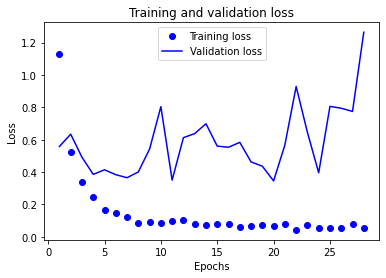

In [14]:
# Plotting loss and accuracy graphs
## Plotting loss
plot_loss(history)


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

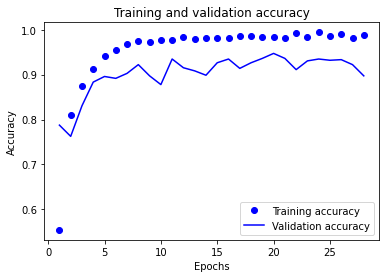

In [15]:
## Plotting accuracy
plot_acc(history)